### General info ###

This is a simple dataset about the air in Bishkek. 
The idea is to be able to predict for the column 'AQI Category', 
basically to understand how healthy or polluted air can be expected.

Since not all the factors are relevant, first need to check the dataset 
and keep only the neccessary columns, after some prepocessing needs to be done
-- I preferred using machine learning tehchiques also for this activity as well. 

Once I got the clean dataset, then I corss checked myself with pycaret best model function. 

** importing the required libraries **

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from catboost import CatBoostClassifier

In [95]:
data = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1025\0103 Bishkek_PM2.5_2021_YTD.csv")

In [3]:
data

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Bishkek,PM2.5 - Principal,2021-01-01 02:00 AM,2021,1,1,2,269.5,320,Hazardous,288.0,UG/M3,1 Hr,Valid
1,Bishkek,PM2.5 - Principal,2021-01-01 03:00 AM,2021,1,1,3,278.4,329,Hazardous,291.0,UG/M3,1 Hr,Valid
2,Bishkek,PM2.5 - Principal,2021-01-01 04:00 AM,2021,1,1,4,283.5,334,Hazardous,306.0,UG/M3,1 Hr,Valid
3,Bishkek,PM2.5 - Principal,2021-01-01 05:00 AM,2021,1,1,5,288.2,338,Hazardous,299.0,UG/M3,1 Hr,Valid
4,Bishkek,PM2.5 - Principal,2021-01-01 06:00 AM,2021,1,1,6,287.6,338,Hazardous,286.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,Bishkek,PM2.5 - Principal,2021-12-31 09:00 PM,2021,12,31,21,73.1,160,Unhealthy,19.0,UG/M3,1 Hr,Valid
8362,Bishkek,PM2.5 - Principal,2021-12-31 10:00 PM,2021,12,31,22,48.5,133,Unhealthy for Sensitive Groups,24.0,UG/M3,1 Hr,Valid
8363,Bishkek,PM2.5 - Principal,2021-12-31 11:00 PM,2021,12,31,23,30.7,90,Moderate,13.0,UG/M3,1 Hr,Valid
8364,Bishkek,PM2.5 - Principal,2022-01-01 12:00 AM,2022,1,1,0,21.8,71,Moderate,13.0,UG/M3,1 Hr,Valid


In [96]:
data['AQI Category'].unique()

array(['Hazardous', 'Very Unhealthy', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Moderate', 'Good', nan],
      dtype=object)

#### Check columns to be dropped ####

In [4]:
data['Parameter'].nunique()

1

In [6]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Suspect', 'Missing'], dtype=object)

In [7]:
data['Conc. Unit'].nunique()

1

In [8]:
data['Duration'].nunique()

1

In [9]:
data.drop(['Site', 'Parameter', 'Date (LT)', 'Conc. Unit', 'Duration','QC Name'], axis=1, inplace=True)

In [10]:
data

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2021,1,1,2,269.5,320,Hazardous,288.0
1,2021,1,1,3,278.4,329,Hazardous,291.0
2,2021,1,1,4,283.5,334,Hazardous,306.0
3,2021,1,1,5,288.2,338,Hazardous,299.0
4,2021,1,1,6,287.6,338,Hazardous,286.0
...,...,...,...,...,...,...,...,...
8361,2021,12,31,21,73.1,160,Unhealthy,19.0
8362,2021,12,31,22,48.5,133,Unhealthy for Sensitive Groups,24.0
8363,2021,12,31,23,30.7,90,Moderate,13.0
8364,2022,1,1,0,21.8,71,Moderate,13.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8366 non-null   int64  
 1   Month          8366 non-null   int64  
 2   Day            8366 non-null   int64  
 3   Hour           8366 non-null   int64  
 4   NowCast Conc.  8366 non-null   float64
 5   AQI            8366 non-null   int64  
 6   AQI Category   8278 non-null   object 
 7   Raw Conc.      8366 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 523.0+ KB


#### check the outliers boxplot & lineplot

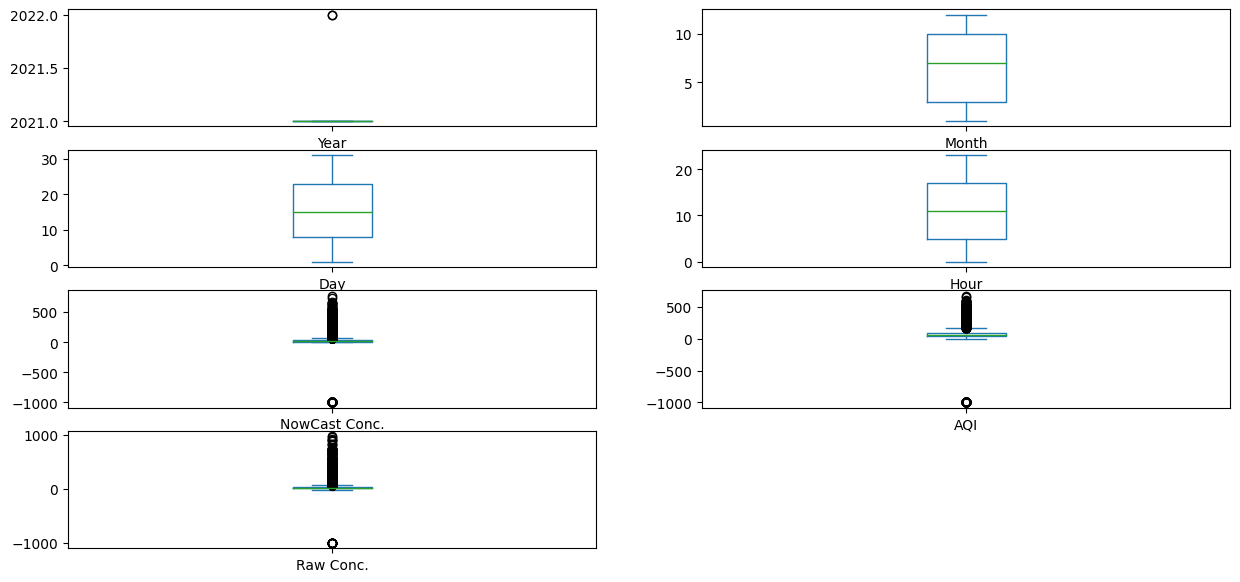

In [12]:
data.plot(kind='box', subplots=True, layout=(4,2), figsize=(15,7))
plt.show()

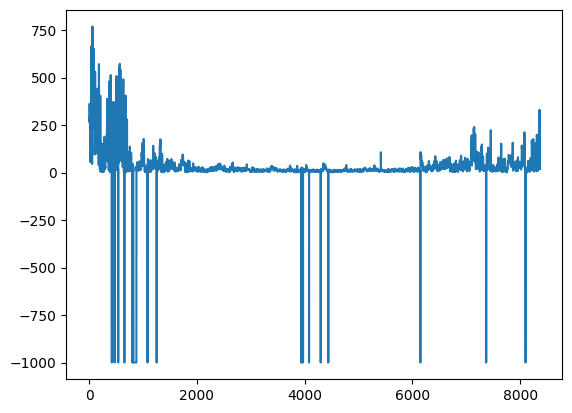

In [13]:
plt.plot([i for i in range(len(data))], data['NowCast Conc.'])

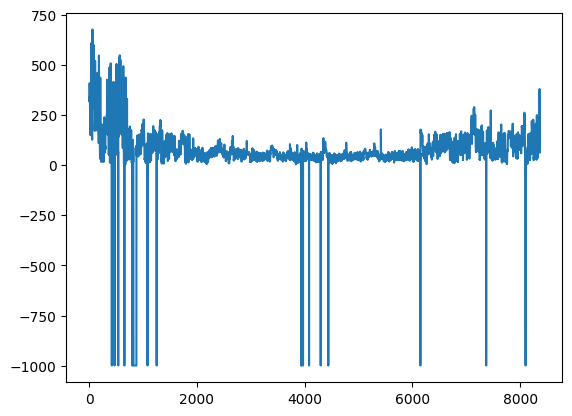

In [14]:
plt.plot([i for i in range(len(data))], data['AQI'])

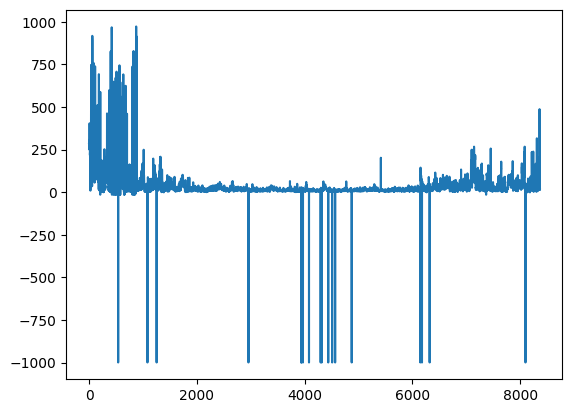

In [15]:
plt.plot([i for i in range(len(data))], data['Raw Conc.'])

#### check the value of the outlier

In [16]:
data['NowCast Conc.'].unique() 

array([269.5, 278.4, 283.5, ..., 218.8, 127.4,  73.1])

In [17]:
data['NowCast Conc.'].sort_values(ascending=True)

1085   -999.0
833    -999.0
834    -999.0
835    -999.0
836    -999.0
        ...  
85      652.0
61      653.4
41      665.4
65      739.6
64      769.1
Name: NowCast Conc., Length: 8366, dtype: float64

In [18]:
data['Raw Conc.'].sort_values(ascending=True)

4316   -999.0
4511   -999.0
8097   -999.0
3936   -999.0
3969   -999.0
        ...  
422     911.0
878     915.0
61      917.0
421     967.0
875     972.0
Name: Raw Conc., Length: 8366, dtype: float64

Since there are 88 missing values out of the 8 366 - could be considered for being dropped, , but prefer to use machine learning technique for the missing values which are marked as -999.0 or -999.

Let's convert these values to NaN

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8366 non-null   int64  
 1   Month          8366 non-null   int64  
 2   Day            8366 non-null   int64  
 3   Hour           8366 non-null   int64  
 4   NowCast Conc.  8366 non-null   float64
 5   AQI            8366 non-null   int64  
 6   AQI Category   8278 non-null   object 
 7   Raw Conc.      8366 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 523.0+ KB


In [20]:
data['NowCast Conc.'] = data['NowCast Conc.'].replace(-999, np.nan)

In [21]:
data['Raw Conc.'] = data['Raw Conc.'].replace(-999, np.nan)

In [22]:
data['AQI'] = data['AQI'].replace(-999.0, np.nan)

In [23]:
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
NowCast Conc.    88
AQI              88
AQI Category     88
Raw Conc.        18
dtype: int64

#### We have missing values in 4 columns: Let's predict the missing values by CatBoostRegressor for the column NowCast Conc and'Raw Conc. and LightGBM Classifier for AQI Category and use simpleimputer for AQI. ####

In [24]:
from catboost import CatBoostRegressor

Separate the data into missing and non-missing

In [26]:
now_cast_data_missing = data[data['NowCast Conc.'].isnull()]
now_cast_data_not_missing = data[~data['NowCast Conc.'].isnull()]

Features and target for the non-missing values

In [27]:
now_cast_input = now_cast_data_not_missing.drop(['NowCast Conc.', 'AQI', 
                                                 'AQI Category', 'Raw Conc.'], 
                                                axis=1)
now_cast_target = now_cast_data_not_missing['NowCast Conc.']

In [28]:
model = CatBoostRegressor()

In [29]:
model.fit(now_cast_input, now_cast_target)

Learning rate set to 0.057176
0:	learn: 62.8857390	total: 151ms	remaining: 2m 30s
1:	learn: 61.1068967	total: 153ms	remaining: 1m 16s
2:	learn: 59.2714083	total: 155ms	remaining: 51.4s
3:	learn: 57.6812545	total: 156ms	remaining: 38.9s
4:	learn: 56.1944836	total: 158ms	remaining: 31.5s
5:	learn: 54.7671077	total: 160ms	remaining: 26.5s
6:	learn: 53.4429761	total: 162ms	remaining: 23s
7:	learn: 52.1374439	total: 164ms	remaining: 20.3s
8:	learn: 51.0716759	total: 166ms	remaining: 18.2s
9:	learn: 50.0048709	total: 168ms	remaining: 16.6s
10:	learn: 49.0205856	total: 169ms	remaining: 15.2s
11:	learn: 48.1524518	total: 171ms	remaining: 14.1s
12:	learn: 47.4013870	total: 173ms	remaining: 13.1s
13:	learn: 46.6820009	total: 175ms	remaining: 12.3s
14:	learn: 46.0494368	total: 177ms	remaining: 11.6s
15:	learn: 45.3881573	total: 179ms	remaining: 11s
16:	learn: 44.7288185	total: 181ms	remaining: 10.5s
17:	learn: 44.1200985	total: 183ms	remaining: 9.96s
18:	learn: 43.5715390	total: 184ms	remaining: 

251:	learn: 27.2195966	total: 577ms	remaining: 1.71s
252:	learn: 27.1735762	total: 579ms	remaining: 1.71s
253:	learn: 27.1167283	total: 581ms	remaining: 1.71s
254:	learn: 27.0929385	total: 583ms	remaining: 1.7s
255:	learn: 27.0871857	total: 585ms	remaining: 1.7s
256:	learn: 27.0584667	total: 586ms	remaining: 1.7s
257:	learn: 27.0449251	total: 588ms	remaining: 1.69s
258:	learn: 27.0231094	total: 590ms	remaining: 1.69s
259:	learn: 27.0026964	total: 592ms	remaining: 1.68s
260:	learn: 26.9923124	total: 593ms	remaining: 1.68s
261:	learn: 26.9659267	total: 595ms	remaining: 1.68s
262:	learn: 26.9491792	total: 597ms	remaining: 1.67s
263:	learn: 26.9150353	total: 599ms	remaining: 1.67s
264:	learn: 26.9072135	total: 601ms	remaining: 1.67s
265:	learn: 26.8727537	total: 603ms	remaining: 1.66s
266:	learn: 26.8202888	total: 604ms	remaining: 1.66s
267:	learn: 26.7924649	total: 606ms	remaining: 1.66s
268:	learn: 26.7657952	total: 608ms	remaining: 1.65s
269:	learn: 26.7431575	total: 609ms	remaining: 1.

468:	learn: 23.3043163	total: 956ms	remaining: 1.08s
469:	learn: 23.2901931	total: 959ms	remaining: 1.08s
470:	learn: 23.2790241	total: 960ms	remaining: 1.08s
471:	learn: 23.2635021	total: 962ms	remaining: 1.07s
472:	learn: 23.2210695	total: 963ms	remaining: 1.07s
473:	learn: 23.2122324	total: 965ms	remaining: 1.07s
474:	learn: 23.2076014	total: 967ms	remaining: 1.07s
475:	learn: 23.2000519	total: 969ms	remaining: 1.07s
476:	learn: 23.1952954	total: 971ms	remaining: 1.06s
477:	learn: 23.1779322	total: 973ms	remaining: 1.06s
478:	learn: 23.1708541	total: 975ms	remaining: 1.06s
479:	learn: 23.1671455	total: 976ms	remaining: 1.06s
480:	learn: 23.1576259	total: 978ms	remaining: 1.05s
481:	learn: 23.1516432	total: 980ms	remaining: 1.05s
482:	learn: 23.1483185	total: 982ms	remaining: 1.05s
483:	learn: 23.1157022	total: 983ms	remaining: 1.05s
484:	learn: 23.1067210	total: 985ms	remaining: 1.04s
485:	learn: 23.1001097	total: 987ms	remaining: 1.04s
486:	learn: 23.0747576	total: 988ms	remaining:

687:	learn: 20.6778139	total: 1.32s	remaining: 600ms
688:	learn: 20.6722972	total: 1.32s	remaining: 598ms
689:	learn: 20.6611620	total: 1.32s	remaining: 596ms
690:	learn: 20.6527971	total: 1.33s	remaining: 594ms
691:	learn: 20.6417235	total: 1.33s	remaining: 592ms
692:	learn: 20.6371445	total: 1.33s	remaining: 590ms
693:	learn: 20.6284364	total: 1.33s	remaining: 588ms
694:	learn: 20.6226771	total: 1.33s	remaining: 586ms
695:	learn: 20.6096093	total: 1.34s	remaining: 584ms
696:	learn: 20.6027655	total: 1.34s	remaining: 582ms
697:	learn: 20.5990512	total: 1.34s	remaining: 580ms
698:	learn: 20.5968170	total: 1.34s	remaining: 578ms
699:	learn: 20.5877672	total: 1.34s	remaining: 576ms
700:	learn: 20.5716863	total: 1.34s	remaining: 574ms
701:	learn: 20.5559725	total: 1.35s	remaining: 572ms
702:	learn: 20.5332006	total: 1.35s	remaining: 570ms
703:	learn: 20.5283357	total: 1.35s	remaining: 568ms
704:	learn: 20.5202894	total: 1.35s	remaining: 566ms
705:	learn: 20.5149650	total: 1.35s	remaining:

910:	learn: 18.6788653	total: 1.71s	remaining: 167ms
911:	learn: 18.6718014	total: 1.71s	remaining: 165ms
912:	learn: 18.6589429	total: 1.71s	remaining: 163ms
913:	learn: 18.6555729	total: 1.71s	remaining: 161ms
914:	learn: 18.6405592	total: 1.71s	remaining: 159ms
915:	learn: 18.6301640	total: 1.71s	remaining: 157ms
916:	learn: 18.6252397	total: 1.72s	remaining: 155ms
917:	learn: 18.6203551	total: 1.72s	remaining: 153ms
918:	learn: 18.6115104	total: 1.72s	remaining: 152ms
919:	learn: 18.6042672	total: 1.72s	remaining: 150ms
920:	learn: 18.6009296	total: 1.72s	remaining: 148ms
921:	learn: 18.5982680	total: 1.72s	remaining: 146ms
922:	learn: 18.5964246	total: 1.73s	remaining: 144ms
923:	learn: 18.5937914	total: 1.73s	remaining: 142ms
924:	learn: 18.5867161	total: 1.73s	remaining: 140ms
925:	learn: 18.5825867	total: 1.73s	remaining: 138ms
926:	learn: 18.5765393	total: 1.73s	remaining: 136ms
927:	learn: 18.5736953	total: 1.73s	remaining: 135ms
928:	learn: 18.5702404	total: 1.74s	remaining:

Features for the missing values

In [31]:
now_cast_input_test = now_cast_data_missing.drop(['NowCast Conc.', 'AQI', 
                                         'AQI Category', 'Raw Conc.'], 
                                          axis=1)

In [32]:
now_cast_predicted_values = model.predict(now_cast_input_test)

In [33]:
data.loc[data['NowCast Conc.'].isnull(), 'NowCast Conc.'] = now_cast_predicted_values

In [34]:
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI              88
AQI Category     88
Raw Conc.        18
dtype: int64

In [35]:
raw_conc_data_missing = data[data['Raw Conc.'].isnull()]

In [36]:
raw_conc_data_not_missing = data[~data['Raw Conc.'].isnull()]

In [38]:
raw_conc_input = raw_conc_data_not_missing.drop(['AQI','AQI Category', 'Raw Conc.'],
                                               axis=1)

In [39]:
raw_conc_target = raw_conc_data_not_missing['Raw Conc.']

In [40]:
model = CatBoostRegressor()

In [41]:
model.fit(raw_conc_input, raw_conc_target)

Learning rate set to 0.057252
0:	learn: 74.5623658	total: 2.67ms	remaining: 2.66s
1:	learn: 71.8861900	total: 5.29ms	remaining: 2.64s
2:	learn: 69.2973678	total: 58.8ms	remaining: 19.5s
3:	learn: 66.9195051	total: 62.6ms	remaining: 15.6s
4:	learn: 64.5794071	total: 65.1ms	remaining: 13s
5:	learn: 62.4769245	total: 70.8ms	remaining: 11.7s
6:	learn: 60.6471307	total: 73.5ms	remaining: 10.4s
7:	learn: 58.8163344	total: 76ms	remaining: 9.43s
8:	learn: 57.1160887	total: 78.4ms	remaining: 8.64s
9:	learn: 55.5651444	total: 80.8ms	remaining: 8s
10:	learn: 54.1754472	total: 83.3ms	remaining: 7.49s
11:	learn: 52.8367400	total: 86.5ms	remaining: 7.12s
12:	learn: 51.6354884	total: 93.5ms	remaining: 7.1s
13:	learn: 50.4615927	total: 96.2ms	remaining: 6.77s
14:	learn: 49.3883950	total: 98.6ms	remaining: 6.47s
15:	learn: 48.4365963	total: 101ms	remaining: 6.2s
16:	learn: 47.5355133	total: 103ms	remaining: 5.97s
17:	learn: 46.7442076	total: 106ms	remaining: 5.76s
18:	learn: 46.0398465	total: 108ms	rem

233:	learn: 28.3967777	total: 583ms	remaining: 1.91s
234:	learn: 28.3717318	total: 586ms	remaining: 1.91s
235:	learn: 28.3623046	total: 588ms	remaining: 1.9s
236:	learn: 28.3385819	total: 590ms	remaining: 1.9s
237:	learn: 28.3299018	total: 593ms	remaining: 1.9s
238:	learn: 28.3061391	total: 595ms	remaining: 1.89s
239:	learn: 28.2956786	total: 597ms	remaining: 1.89s
240:	learn: 28.2727801	total: 599ms	remaining: 1.89s
241:	learn: 28.2360394	total: 601ms	remaining: 1.88s
242:	learn: 28.2200283	total: 604ms	remaining: 1.88s
243:	learn: 28.2165505	total: 607ms	remaining: 1.88s
244:	learn: 28.1972170	total: 609ms	remaining: 1.88s
245:	learn: 28.1859497	total: 611ms	remaining: 1.87s
246:	learn: 28.1725011	total: 613ms	remaining: 1.87s
247:	learn: 28.1692723	total: 616ms	remaining: 1.87s
248:	learn: 28.1586473	total: 618ms	remaining: 1.86s
249:	learn: 28.1375083	total: 620ms	remaining: 1.86s
250:	learn: 28.1166564	total: 622ms	remaining: 1.86s
251:	learn: 28.1088780	total: 624ms	remaining: 1.

401:	learn: 25.4787753	total: 968ms	remaining: 1.44s
402:	learn: 25.4732601	total: 970ms	remaining: 1.44s
403:	learn: 25.4613115	total: 973ms	remaining: 1.44s
404:	learn: 25.4206679	total: 975ms	remaining: 1.43s
405:	learn: 25.4125778	total: 977ms	remaining: 1.43s
406:	learn: 25.4016448	total: 980ms	remaining: 1.43s
407:	learn: 25.3750747	total: 982ms	remaining: 1.42s
408:	learn: 25.3650678	total: 984ms	remaining: 1.42s
409:	learn: 25.3586408	total: 987ms	remaining: 1.42s
410:	learn: 25.3328274	total: 989ms	remaining: 1.42s
411:	learn: 25.3089625	total: 991ms	remaining: 1.41s
412:	learn: 25.2686011	total: 994ms	remaining: 1.41s
413:	learn: 25.2436614	total: 997ms	remaining: 1.41s
414:	learn: 25.2224650	total: 1000ms	remaining: 1.41s
415:	learn: 25.2150866	total: 1s	remaining: 1.41s
416:	learn: 25.2116261	total: 1s	remaining: 1.4s
417:	learn: 25.2055801	total: 1.01s	remaining: 1.4s
418:	learn: 25.1793920	total: 1.01s	remaining: 1.4s
419:	learn: 25.1718765	total: 1.01s	remaining: 1.4s
42

574:	learn: 23.0464569	total: 1.36s	remaining: 1s
575:	learn: 23.0375917	total: 1.36s	remaining: 1s
576:	learn: 23.0333621	total: 1.36s	remaining: 999ms
577:	learn: 23.0169457	total: 1.36s	remaining: 996ms
578:	learn: 22.9962055	total: 1.37s	remaining: 994ms
579:	learn: 22.9825318	total: 1.37s	remaining: 991ms
580:	learn: 22.9692485	total: 1.37s	remaining: 989ms
581:	learn: 22.9617779	total: 1.37s	remaining: 986ms
582:	learn: 22.9556714	total: 1.38s	remaining: 984ms
583:	learn: 22.9402602	total: 1.38s	remaining: 982ms
584:	learn: 22.9275924	total: 1.38s	remaining: 979ms
585:	learn: 22.9126055	total: 1.38s	remaining: 977ms
586:	learn: 22.9084266	total: 1.38s	remaining: 974ms
587:	learn: 22.8945979	total: 1.39s	remaining: 972ms
588:	learn: 22.8795614	total: 1.39s	remaining: 969ms
589:	learn: 22.8665679	total: 1.39s	remaining: 967ms
590:	learn: 22.8536392	total: 1.39s	remaining: 965ms
591:	learn: 22.8415427	total: 1.4s	remaining: 962ms
592:	learn: 22.8372331	total: 1.4s	remaining: 959ms
5

746:	learn: 21.2834251	total: 1.75s	remaining: 591ms
747:	learn: 21.2789983	total: 1.75s	remaining: 589ms
748:	learn: 21.2738976	total: 1.75s	remaining: 587ms
749:	learn: 21.2656735	total: 1.75s	remaining: 584ms
750:	learn: 21.2498329	total: 1.75s	remaining: 582ms
751:	learn: 21.2389853	total: 1.76s	remaining: 580ms
752:	learn: 21.2294867	total: 1.76s	remaining: 577ms
753:	learn: 21.2245178	total: 1.76s	remaining: 575ms
754:	learn: 21.2186252	total: 1.76s	remaining: 573ms
755:	learn: 21.2128839	total: 1.77s	remaining: 570ms
756:	learn: 21.2052890	total: 1.77s	remaining: 568ms
757:	learn: 21.2020472	total: 1.77s	remaining: 565ms
758:	learn: 21.1972464	total: 1.77s	remaining: 563ms
759:	learn: 21.1912288	total: 1.77s	remaining: 561ms
760:	learn: 21.1882556	total: 1.78s	remaining: 558ms
761:	learn: 21.1726482	total: 1.78s	remaining: 556ms
762:	learn: 21.1681120	total: 1.78s	remaining: 553ms
763:	learn: 21.1616935	total: 1.78s	remaining: 551ms
764:	learn: 21.1503866	total: 1.79s	remaining:

921:	learn: 19.7898304	total: 2.13s	remaining: 181ms
922:	learn: 19.7836977	total: 2.14s	remaining: 178ms
923:	learn: 19.7723506	total: 2.14s	remaining: 176ms
924:	learn: 19.7613580	total: 2.14s	remaining: 174ms
925:	learn: 19.7556022	total: 2.14s	remaining: 171ms
926:	learn: 19.7434941	total: 2.15s	remaining: 169ms
927:	learn: 19.7381846	total: 2.15s	remaining: 167ms
928:	learn: 19.7329748	total: 2.15s	remaining: 164ms
929:	learn: 19.7154463	total: 2.15s	remaining: 162ms
930:	learn: 19.7119258	total: 2.16s	remaining: 160ms
931:	learn: 19.7016387	total: 2.16s	remaining: 157ms
932:	learn: 19.6954111	total: 2.16s	remaining: 155ms
933:	learn: 19.6910368	total: 2.16s	remaining: 153ms
934:	learn: 19.6791834	total: 2.17s	remaining: 151ms
935:	learn: 19.6708918	total: 2.17s	remaining: 148ms
936:	learn: 19.6620359	total: 2.17s	remaining: 146ms
937:	learn: 19.6493290	total: 2.17s	remaining: 144ms
938:	learn: 19.6378843	total: 2.17s	remaining: 141ms
939:	learn: 19.6329904	total: 2.18s	remaining:

In [42]:
raw_conc_input_test = raw_conc_data_missing.drop(['AQI','AQI Category', 'Raw Conc.'],
                                               axis=1)

In [43]:
raw_conc_predicted_values = model.predict(raw_conc_input_test)

In [45]:
data.loc[data['Raw Conc.'].isnull(), 'Raw Conc.'] = raw_conc_predicted_values

In [46]:
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI              88
AQI Category     88
Raw Conc.         0
dtype: int64

In [47]:
import lightgbm as lgb

In [48]:
aqi_cat_data_missing = data[data['AQI Category'].isnull()]

In [49]:
aqi_cat_data_not_missing = data[~data['AQI Category'].isnull()]

In [50]:
aqi_cat_input = aqi_cat_data_not_missing.drop(['AQI Category', 'AQI'], axis=1)

In [52]:
aqi_cat_target = aqi_cat_data_not_missing['AQI Category']

In [53]:
model = lgb.LGBMClassifier()

In [54]:
model.fit(aqi_cat_input, aqi_cat_target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 5
[LightGBM] [Info] Start training from score -1.004379
[LightGBM] [Info] Start training from score -3.839573
[LightGBM] [Info] Start training from score -0.904641
[LightGBM] [Info] Start training from score -2.329273
[LightGBM] [Info] Start training from score -2.443495
[LightGBM] [Info] Start training from score -3.758666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier()

In [55]:
aqi_cat_input_test = aqi_cat_data_missing.drop(['AQI Category', 'AQI'], axis=1)

In [57]:
aqi_cat_predicted_values = model.predict(aqi_cat_input_test)

In [58]:
data.loc[data['AQI Category'].isnull(), 'AQI Category'] = aqi_cat_predicted_values

In [60]:
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI              88
AQI Category      0
Raw Conc.         0
dtype: int64

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data[['AQI']])
data['AQI'] = imputer.transform(data[['AQI']])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8366 non-null   int64  
 1   Month          8366 non-null   int64  
 2   Day            8366 non-null   int64  
 3   Hour           8366 non-null   int64  
 4   NowCast Conc.  8366 non-null   float64
 5   AQI            8366 non-null   float64
 6   AQI Category   8366 non-null   object 
 7   Raw Conc.      8366 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 523.0+ KB


### Let's create machine learning model for the AQI category as target

In [65]:
X = data.drop(['AQI Category'], axis=1)

In [66]:
y = data['AQI Category']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model = RandomForestClassifier()

In [70]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
feature_importances = model.feature_importances_

In [91]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

In [92]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

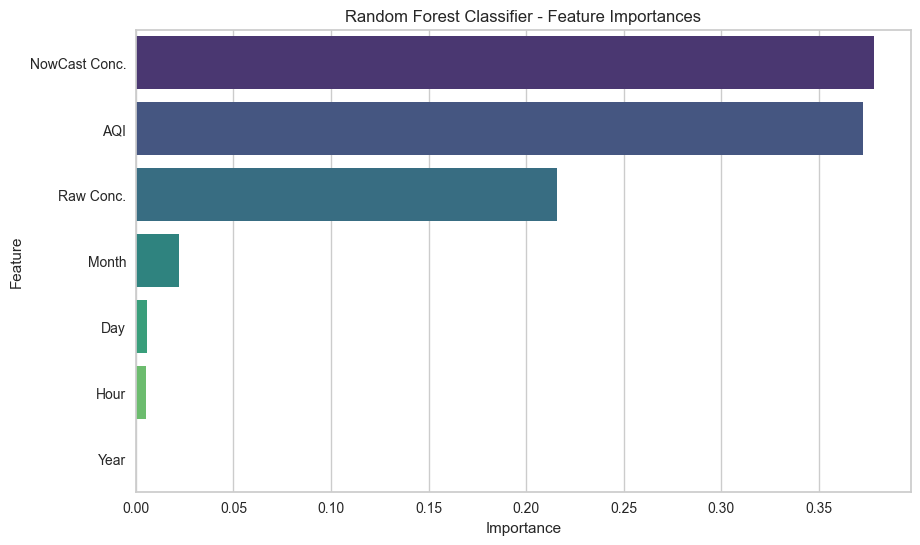

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Classifier - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [73]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array(['Moderate', 'Moderate', 'Moderate', ..., 'Good', 'Good',
       'Unhealthy'], dtype=object)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy = accuracy_score(y_test, y_pred)

In [78]:
accuracy

0.9982078853046595

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
cm = confusion_matrix(y_test, y_pred)

In [81]:
cm

array([[580,   0,   0,   0,   0,   0],
       [  0,  33,   0,   0,   0,   1],
       [  0,   0, 681,   0,   0,   0],
       [  0,   0,   0, 185,   1,   0],
       [  0,   0,   1,   0, 150,   0],
       [  0,   0,   0,   0,   0,  42]], dtype=int64)

<AxesSubplot: >

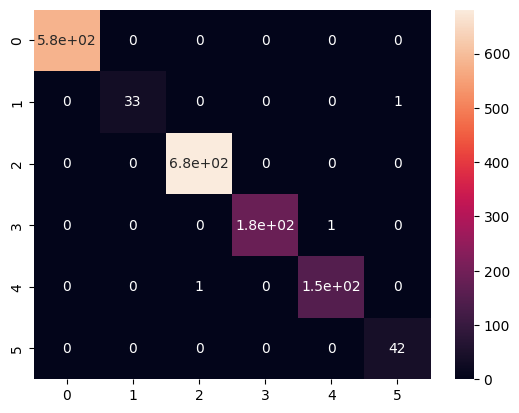

In [82]:
sns.heatmap(cm, annot=True)

In [83]:
from pycaret.classification import *

In [84]:
Step = setup(data=data, target='AQI Category')

,Description,Value
0,Session id,7142
1,Target,AQI Category
2,Target type,Multiclass
3,Target mapping,"Good: 0, Hazardous: 1, Moderate: 2, Unhealthy: 3, Unhealthy for Sensitive Groups: 4, Very Unhealthy: 5"
4,Original data shape,"(8366, 8)"
5,Transformed data shape,"(8366, 8)"
6,Transformed train set shape,"(5856, 8)"
7,Transformed test set shape,"(2510, 8)"
8,Numeric features,7
9,Preprocess,True


In [85]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9985,0.9985,0.8320
catboost,CatBoost Classifier,0.9988,1.0000,0.9988,0.9988,0.9988,0.9983,0.9983,3.5630
dt,Decision Tree Classifier,0.9986,0.9992,0.9986,0.9987,0.9986,0.9980,0.9980,0.0220
rf,Random Forest Classifier,0.9983,1.0000,0.9983,0.9983,0.9983,0.9975,0.9975,0.1190
lightgbm,Light Gradient Boosting Machine,0.9978,1.0000,0.9978,0.9978,0.9978,0.9968,0.9968,0.4050
xgboost,Extreme Gradient Boosting,0.9930,1.0000,0.9930,0.9932,0.9930,0.9898,0.9898,0.0870
et,Extra Trees Classifier,0.9928,1.0000,0.9928,0.9930,0.9928,0.9896,0.9896,0.1160
lr,Logistic Regression,0.9918,0.9997,0.9918,0.9919,0.9918,0.9881,0.9881,1.1360
knn,K Neighbors Classifier,0.9752,0.9974,0.9752,0.9757,0.9752,0.9639,0.9641,0.0370
lda,Linear Discriminant Analysis,0.9520,0.9902,0.9520,0.9546,0.9519,0.9298,0.9304,0.0190


In [97]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9966,1.0000,0.9966,0.9966,0.9966,0.9950,0.9950
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9966,1.0000,0.9966,0.9967,0.9966,0.9950,0.9950
7,0.9966,0.9997,0.9966,0.9966,0.9966,0.9950,0.9950
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [98]:
gbc_tuned = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9983,1.0000,0.9983,0.9983,0.9983,0.9975,0.9975
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9966,1.0000,0.9966,0.9967,0.9966,0.9950,0.9950
7,0.9983,1.0000,0.9983,0.9983,0.9983,0.9975,0.9975
8,0.9983,1.0000,0.9983,0.9983,0.9983,0.9975,0.9975


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [99]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…